# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

import missingno
import scipy


In [2]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.columns = df.columns.str.lower()

In [4]:
print(f'Shape of the given dataset: {df.shape}')

Shape of the given dataset: (8950, 18)


In [5]:
print(f'Summary of the data: \n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [6]:
print(f'Data types in the given dataset is: \n{df.dtypes}')

Data types in the given dataset is: 
cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object


In [7]:
print(f'Null values in given dataset: \n{df.isnull().sum()}')

Null values in given dataset: 
cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64


In [8]:
print(f'Columns in given dataset: \n{df.columns}')

Columns in given dataset: 
Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')


In [9]:
print(f'memory useage: \n{df.memory_usage()}')
print('***********************************************')
print(f'sum of memory usage: \n{df.memory_usage().sum()}')

memory useage: 
Index                                 128
cust_id                             71600
balance                             71600
balance_frequency                   71600
purchases                           71600
oneoff_purchases                    71600
installments_purchases              71600
cash_advance                        71600
purchases_frequency                 71600
oneoff_purchases_frequency          71600
purchases_installments_frequency    71600
cash_advance_frequency              71600
cash_advance_trx                    71600
purchases_trx                       71600
credit_limit                        71600
payments                            71600
minimum_payments                    71600
prc_full_payment                    71600
tenure                              71600
dtype: int64
***********************************************
sum of memory usage: 
1288928


Basic Stastics

In [10]:
df.describe().T.style.background_gradient(cmap = 'Spectral')

,count,mean,std,min,25%,50%,75%,max
balance,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
balance_frequency,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
purchases,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
oneoff_purchases,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
installments_purchases,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
cash_advance,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
purchases_frequency,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
oneoff_purchases_frequency,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
purchases_installments_frequency,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
cash_advance_frequency,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [11]:
df.corr().T.style.background_gradient(cmap = 'Spectral')

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
balance,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
balance_frequency,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
purchases,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
oneoff_purchases,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
installments_purchases,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
cash_advance,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
purchases_frequency,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
oneoff_purchases_frequency,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
purchases_installments_frequency,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
cash_advance_frequency,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


# Missing value Imputation

<AxesSubplot:>

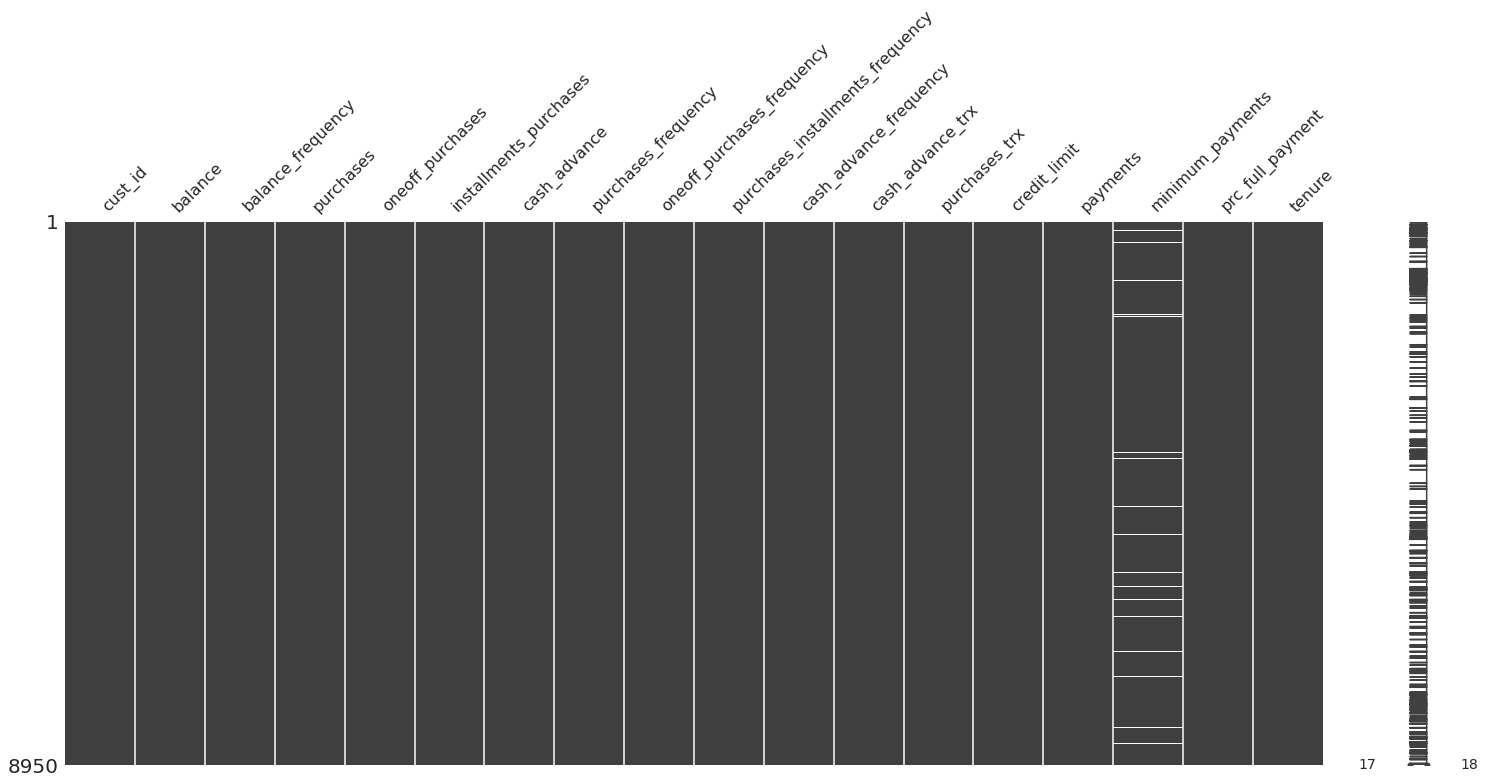

In [12]:
missingno.matrix(df)

<AxesSubplot:>

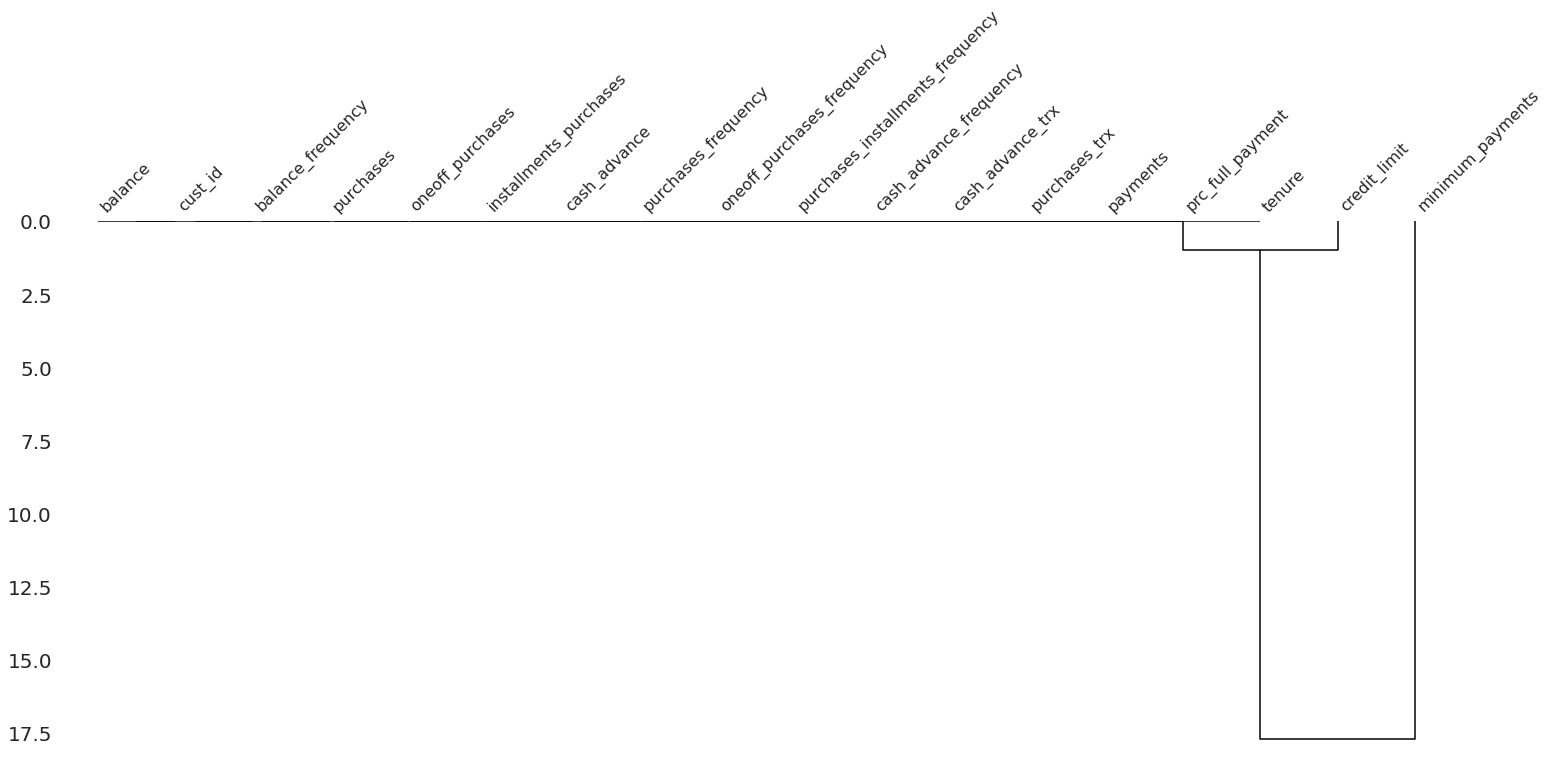

In [13]:
missingno.dendrogram(df)

<AxesSubplot:>

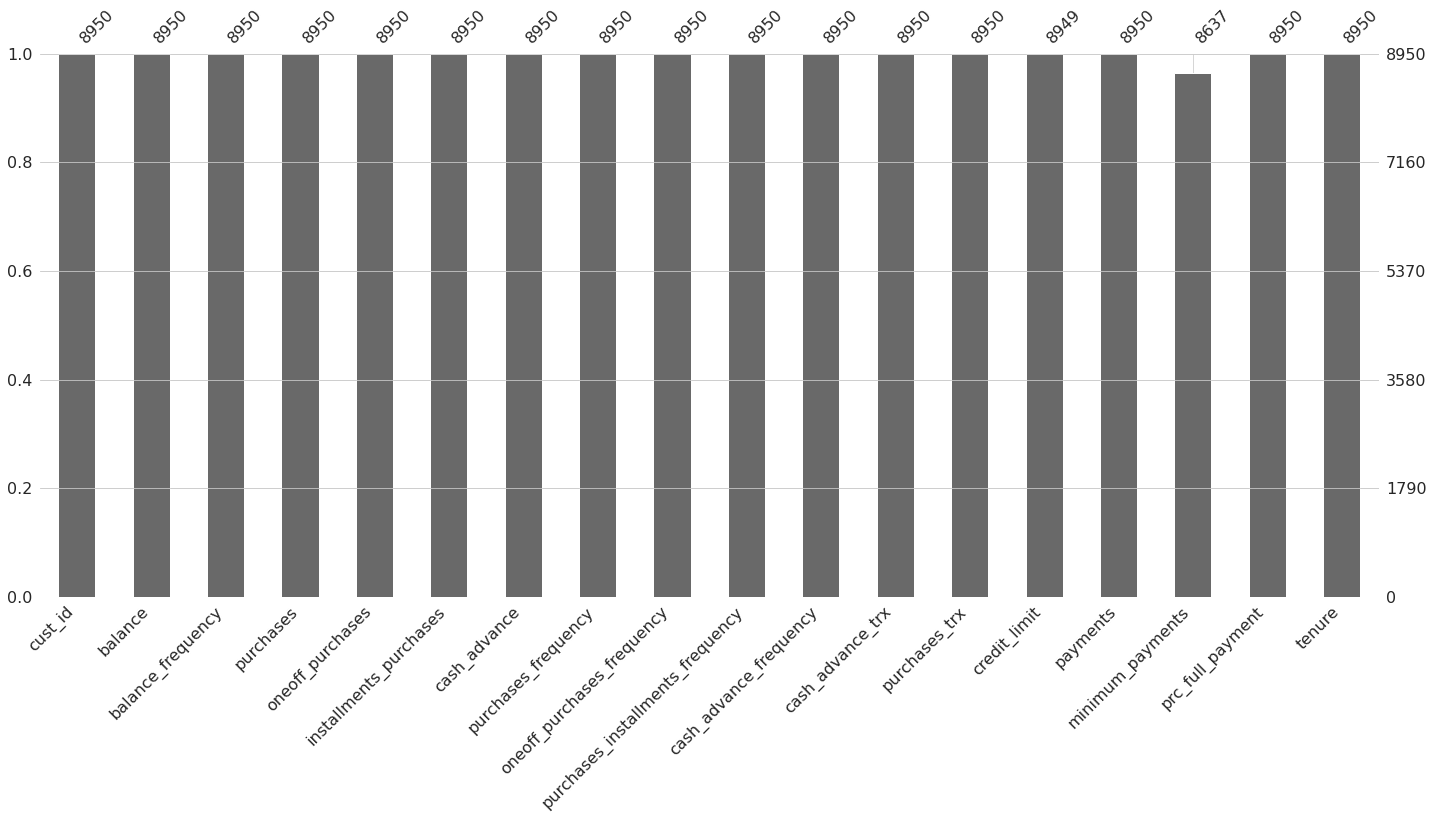

In [14]:
missingno.bar(df)

In [15]:
def check_missing_value(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = True)
    return pd.concat([total, percentage], axis=1, keys = ['total', 'percentage'])

In [16]:
check_missing_value(df).style.background_gradient(cmap = 'Spectral')

,total,percentage
minimum_payments,313,3.497207
credit_limit,1,0.011173
cust_id,0,0.000000
balance,0,0.000000
prc_full_payment,0,0.000000
payments,0,0.000000
purchases_trx,0,0.000000
cash_advance_trx,0,0.000000
cash_advance_frequency,0,0.000000
purchases_installments_frequency,0,0.000000


In [17]:
df['minimum_payments'] = df['minimum_payments'].fillna(df['minimum_payments'].mean())
df['credit_limit'] = df['credit_limit'].fillna(df['credit_limit'].mean())

In [18]:
check_missing_value(df)

,total,percentage
cust_id,0,0.0
balance,0,0.0
prc_full_payment,0,0.0
minimum_payments,0,0.0
payments,0,0.0
credit_limit,0,0.0
purchases_trx,0,0.0
cash_advance_trx,0,0.0
cash_advance_frequency,0,0.0
purchases_installments_frequency,0,0.0


In [19]:
df[df.duplicated()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


# Exploratory Data Analysis

Univariate Analysis

In [20]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


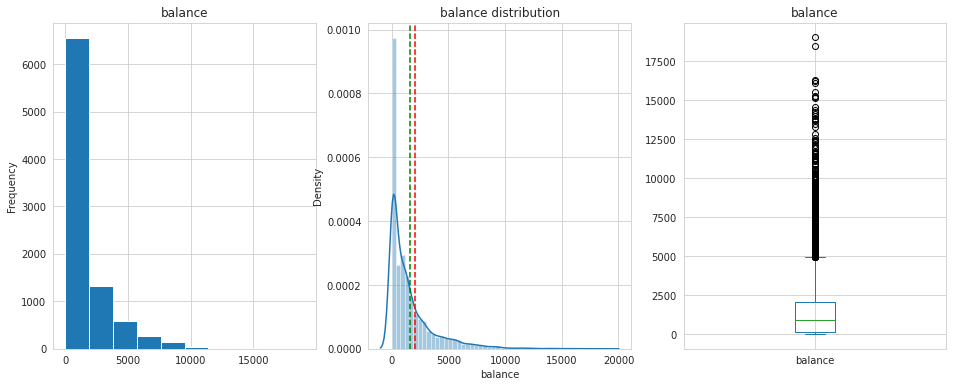

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


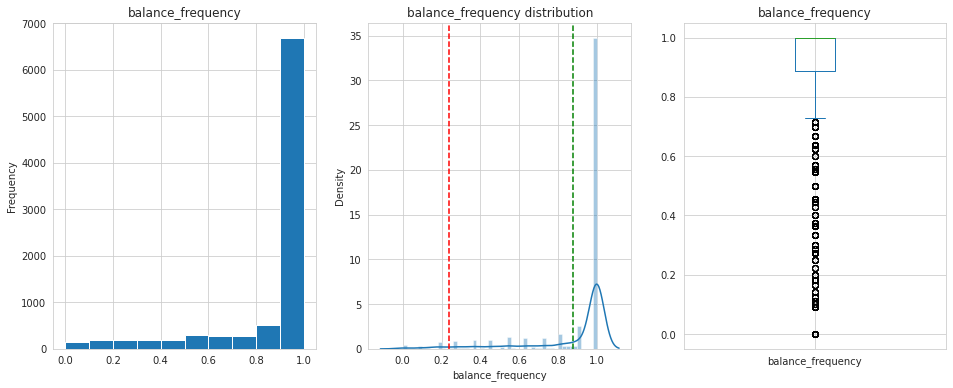

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


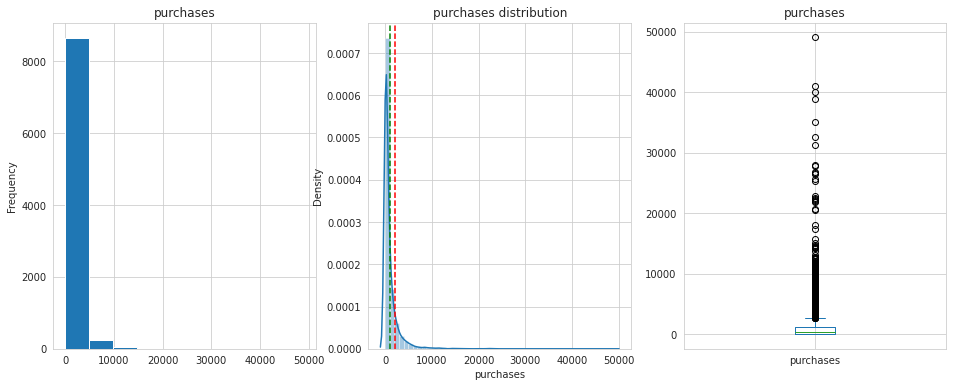

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


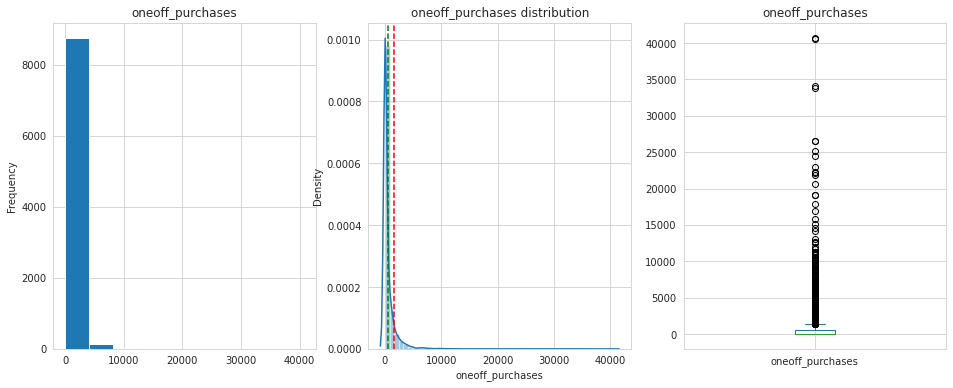

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


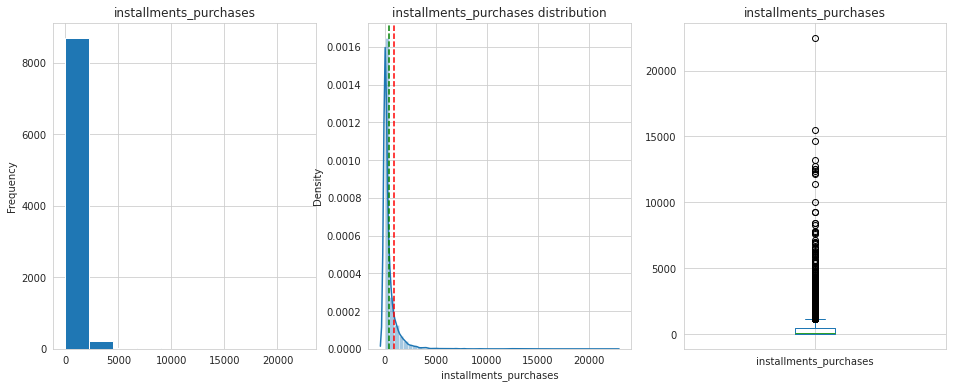

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


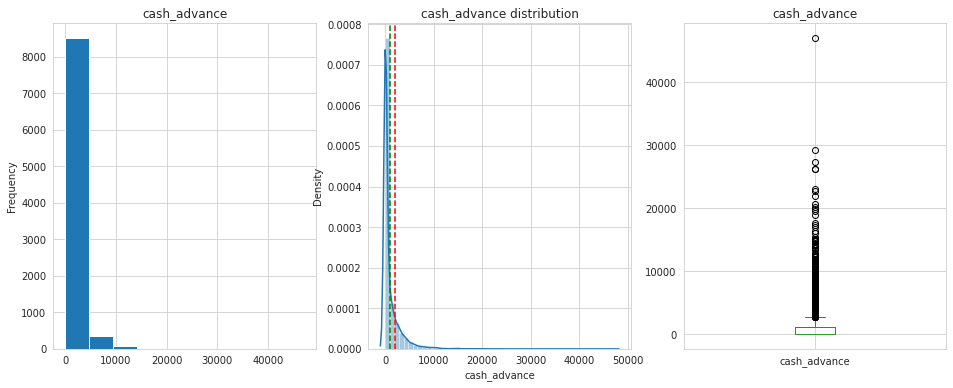

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


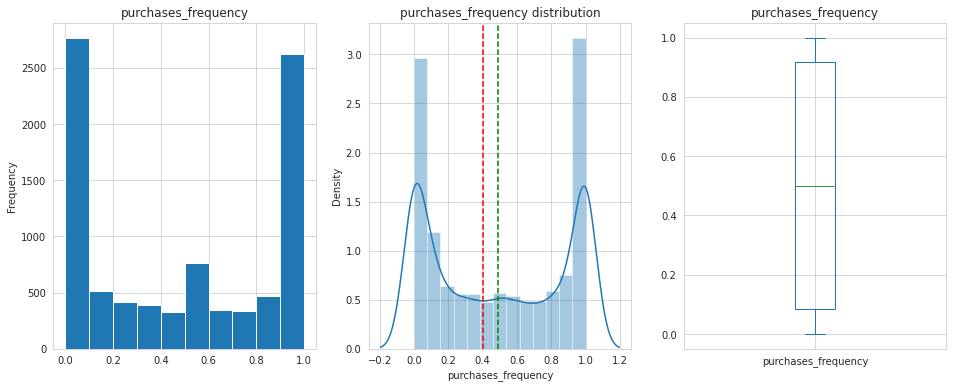

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


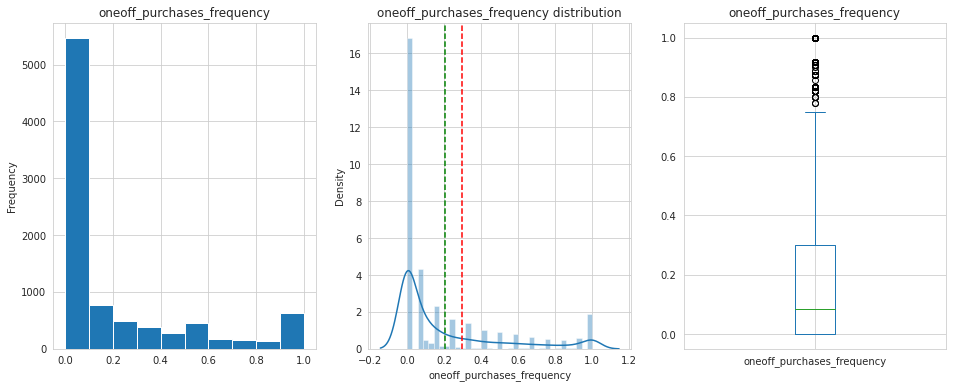

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


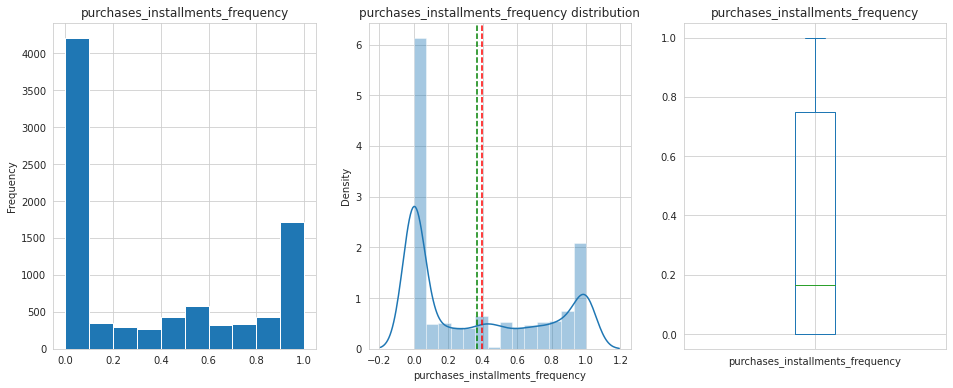

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


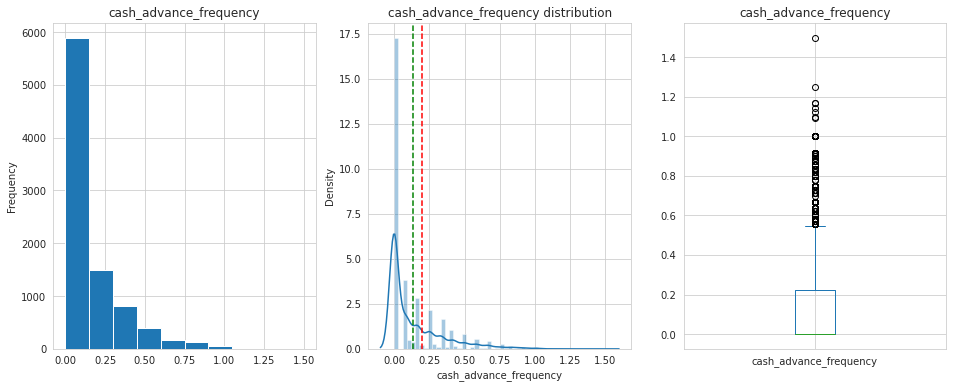

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


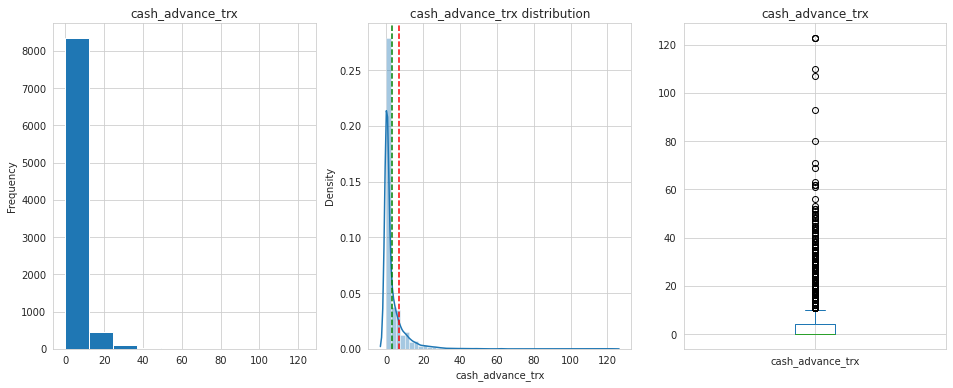

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


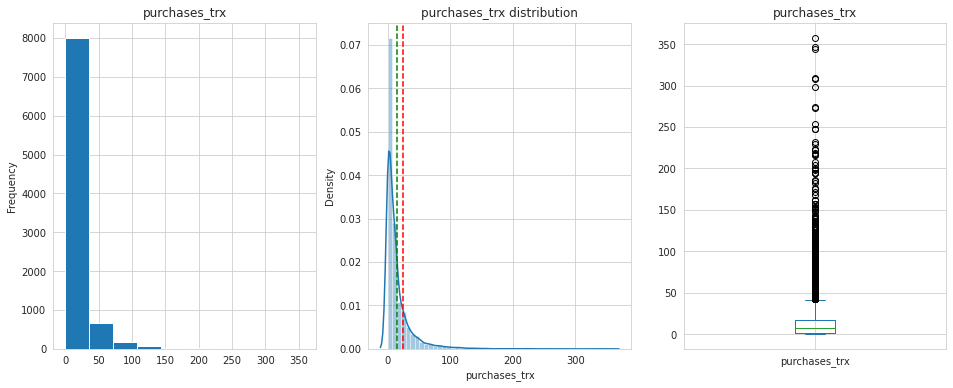

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


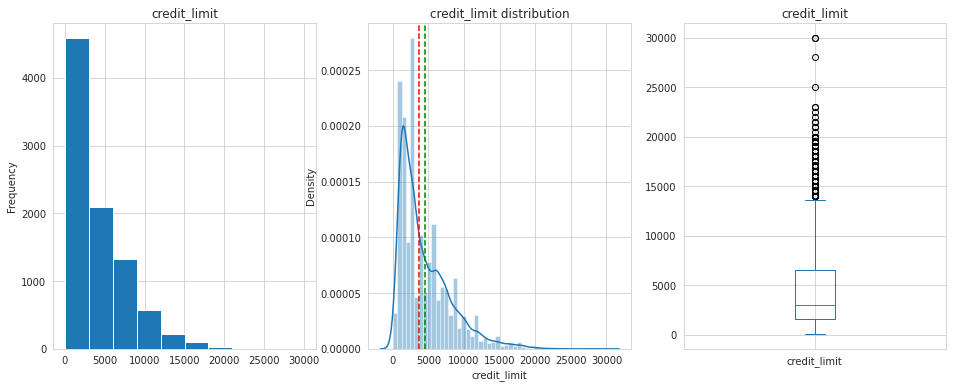

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


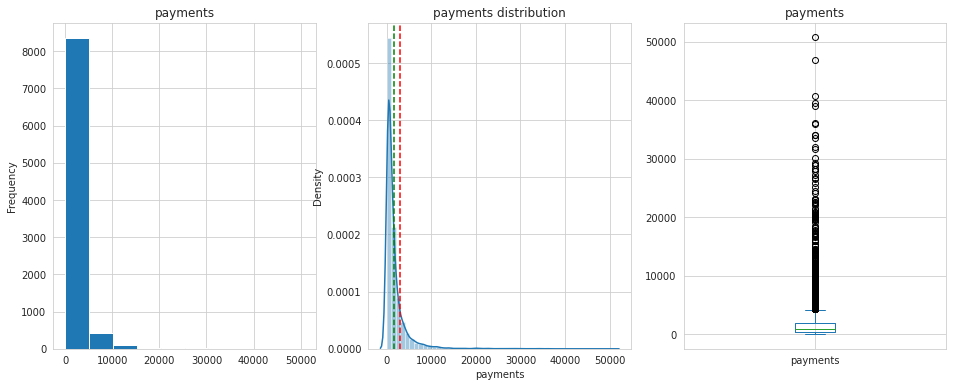

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


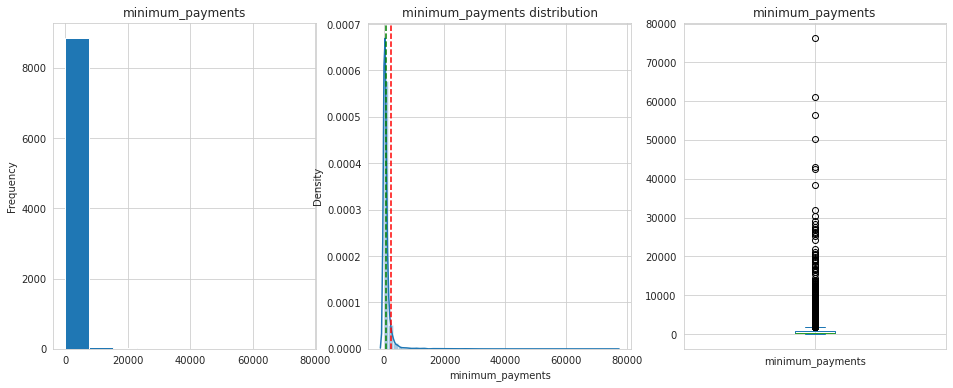

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


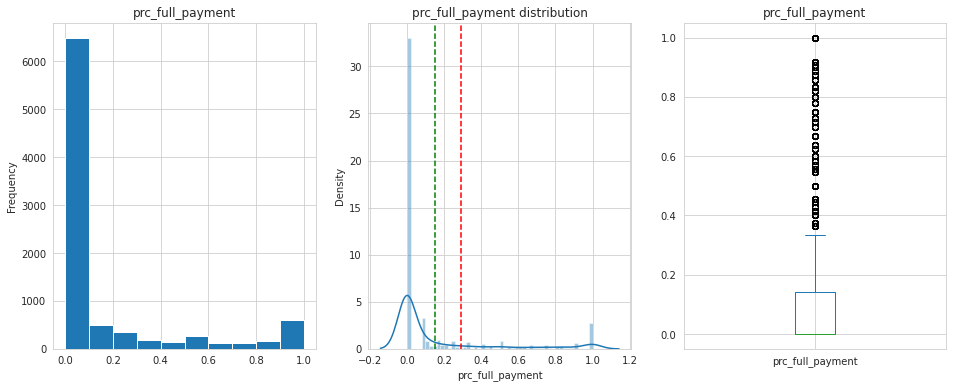

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


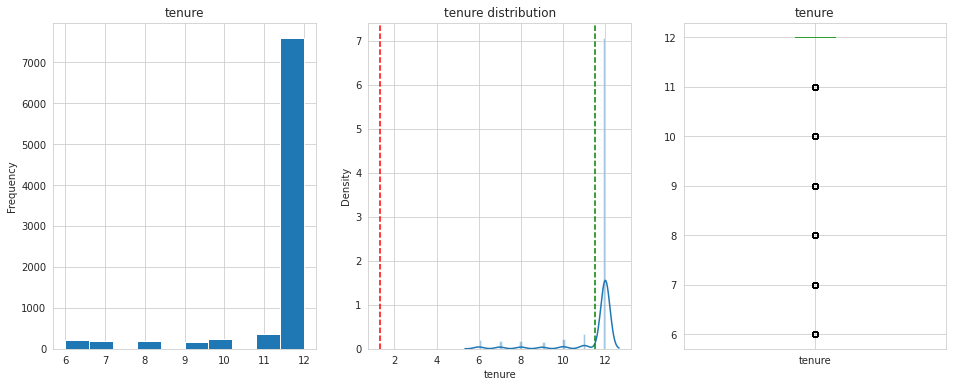

In [21]:
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

<AxesSubplot:xlabel='payments', ylabel='credit_limit'>

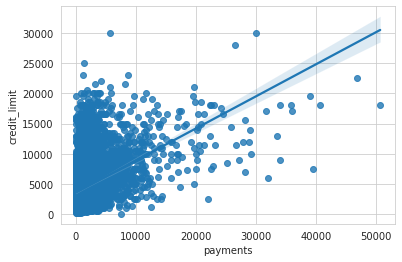

In [22]:
sns.regplot(data = df, y = 'credit_limit', x = 'payments')

<AxesSubplot:xlabel='balance', ylabel='balance_frequency'>

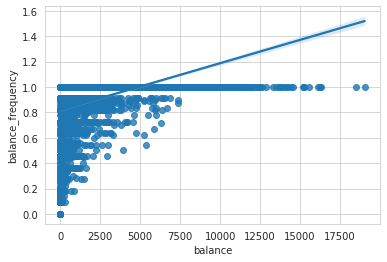

In [23]:
sns.regplot(data = df, y = 'balance_frequency', x = 'balance')

<AxesSubplot:>

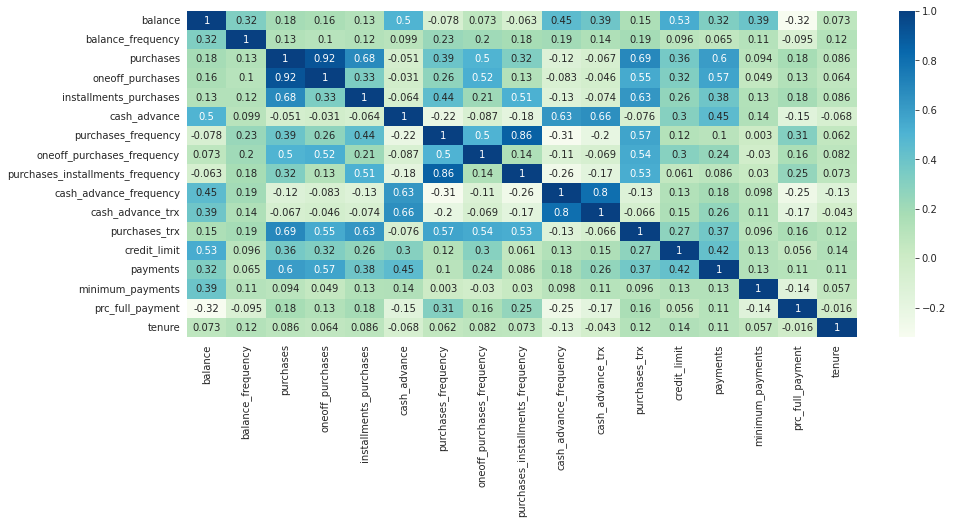

In [24]:
plt.figure(figsize=(15, 6))

sns.heatmap(num_feature.corr(), annot = True, cmap = 'GnBu')

# Clustering

In [25]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, ClusteringScoreVisualizer

from scipy.cluster import hierarchy as hierarchy

In [26]:
df.drop(['cust_id'], axis = 1, inplace = True)

In [27]:
ss = StandardScaler()
train_df = ss.fit_transform(df)
train_df.shape

(8950, 17)

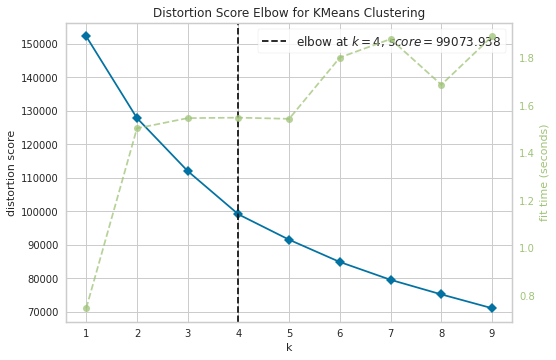

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kmeans = KMeans(n_clusters=5)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(train_df)
vis_elbow.poof()

In [29]:
kmeans.fit(train_df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

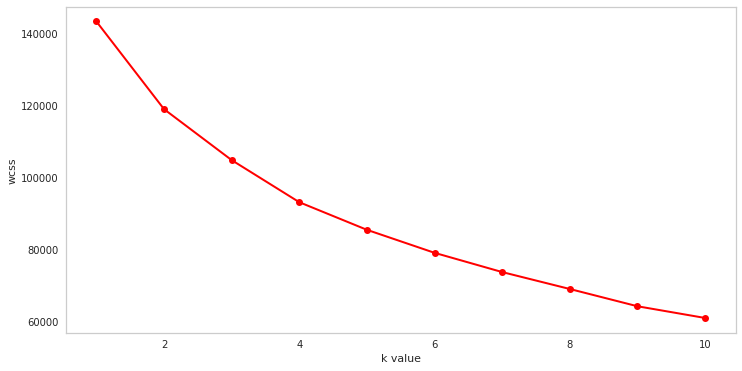

In [30]:
x = train_df[:, 1:]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth= 2, color = "red", marker = 'o')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=17)

label = kmeans.fit_predict(x)
print(label)

[ 8  2  6 ... 14  0  0]


In [32]:
centers = kmeans.cluster_centers_
print(centers)

[[-4.91610374e-01 -3.52882192e-01 -2.18390718e-01 -4.33218995e-01
   3.06462403e-01 -8.56641440e-01 -3.16215516e-01 -8.18460010e-01
   6.99365838e-01  1.84994471e-01 -5.07501696e-01 -4.73085995e-01
  -3.78864732e-01 -1.82029949e-01 -3.69065968e-01 -3.17888397e+00]
 [ 4.36446274e-01  1.46515408e-01  6.82974971e-02  2.20474537e-01
   1.20562015e+00  8.47562425e-01  4.06783224e-01  7.64295825e-01
   1.84209385e+00  1.59235962e+00  4.22086330e-01  7.45921169e-01
   4.50796111e-01  3.10641504e-01 -3.87571915e-01  1.33794432e-01]
 [ 3.74298240e-01 -4.04012426e-01 -2.88607448e-01 -4.25015069e-01
   1.13620742e+00 -1.01013041e+00 -4.98632827e-01 -8.41052836e-01
   1.53050348e+00  1.12171319e+00 -5.27371713e-01  4.85060940e-01
   1.85710727e-01  1.90198463e-01 -4.25547571e-01  1.79935876e-01]
 [ 4.75757446e-01  3.35617712e+00  3.68699025e+00  1.16177122e+00
  -2.43756461e-01  1.11078715e+00  2.19188383e+00  8.25503091e-01
  -3.14028511e-01 -2.31484132e-01  3.19260994e+00  1.29026752e+00
   1.87